In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
sns.set()
data = pd.read_csv('E:\EECS\Corona project\COVID_final\patient_data.csv')
data = data[['id', 'country', 'gender', 'age', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered']]

In [183]:
bools = ['visiting Wuhan', 'from Wuhan', 'death', 'recovered']
data[bools] = data[bools].fillna(0)
data.loc[(data.death.str.len() > 1.0), 'death'] = 1
data.loc[(data.recovered.str.len() > 1.0), 'recovered'] = 1
data[bools] = data[bools].astype(int)
data[bools] = data[bools].astype(bool)

In [184]:
gender = data[['gender', 'death', 'recovered']]
gender = gender.dropna(subset=['gender'])
total = len(gender)
male = len(gender[gender['gender'] == 'male'])
female = len(gender[gender['gender'] == 'female'])
filtered = gender.groupby('gender').sum()
filtered['positive'] = [male, female]
filtered = filtered / total * 100
filtered = filtered.reset_index()

In [185]:
reshaped = pd.DataFrame(data={})
reshaped['gender'] = ['male', 'male', 'male', 'female', 'female', 'female']
temp = filtered.loc[1, ['positive', 'death', 'recovered']].tolist()
temp.extend(filtered.loc[0, ['positive', 'death', 'recovered']].tolist())
reshaped['percentage'] = temp
reshaped['status'] = ['positive', 'death', 'recovered', 'positive', 'death', 'recovered']
reshaped

,gender,percentage,status
0,male,44.254279,positive
1,male,3.056235,death
2,male,5.929095,recovered
3,female,55.745721,positive
4,female,1.528117,death
5,female,4.889976,recovered


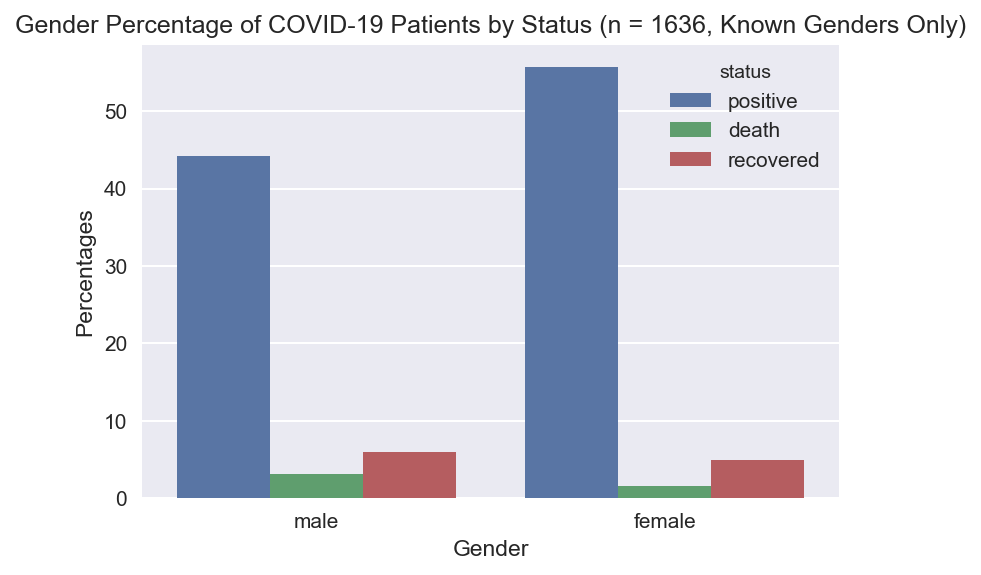

In [186]:
plt.figure(dpi=150)
gender_plot = sns.barplot(x='gender', y='percentage', data=reshaped, hue='status')
plt.title('Gender Percentage of COVID-19 Patients by Status (n = 1636, Known Genders Only)')
plt.ylabel('Percentages')
plt.xlabel('Gender')
gender_plot

In [187]:
age_desc = ['Adolescents(<20)', 'Young Adults (20~39)', 'Adults (40~64)', 'Elderly (65+)']
age = data[['age', 'death', 'recovered']]
age = age.dropna(subset=['age'])
total = len(age)
combined = pd.DataFrame(data={})
adol = age[age.age < 20].copy()
adol.age = age_desc[0]
young = age[(age.age >= 20) & (age.age < 40)].copy()
young.age = age_desc[1]
adults = age[(age.age >= 40) & (age.age < 65)].copy()
adults.age = age_desc[2]
elderly = age[age.age >= 65].copy()
elderly.age = age_desc[3]
combined = pd.concat([adol, young, adults, elderly])
combined = combined.groupby('age').sum()
combined['confirmed'] = [len(adol), len(adults), len(elderly), len(young)]
combined = combined / total * 100
combined = combined.reindex(age_desc).reset_index()

,age,death,recovered,confirmed
0,Adolescents(<20),0.000000,0.864362,4.255319
1,Young Adults (20~39),0.199468,3.856383,25.132979
2,Adults (40~64),0.997340,5.252660,42.287234
3,Elderly (65+),3.856383,1.130319,28.324468


In [188]:
reshaped = pd.DataFrame(data={})
status = ['death', 'recovered', 'confirmed']
for i in range(3):
    temp = pd.DataFrame(data={})
    temp['age'] = age_desc
    temp['percentages'] = combined.loc[:, [status[i]]]
    temp['status'] = [status[i], status[i], status[i], status[i]]
    if len(reshaped) == 0:
        reshaped = temp
    else:
        reshaped = pd.concat([reshaped, temp])
reshaped

,age,percentages,status
0,Adolescents(<20),0.000000,death
1,Young Adults (20~39),0.199468,death
2,Adults (40~64),0.997340,death
3,Elderly (65+),3.856383,death
0,Adolescents(<20),0.864362,recovered
1,Young Adults (20~39),3.856383,recovered
2,Adults (40~64),5.252660,recovered
3,Elderly (65+),1.130319,recovered
0,Adolescents(<20),4.255319,confirmed
1,Young Adults (20~39),25.132979,confirmed


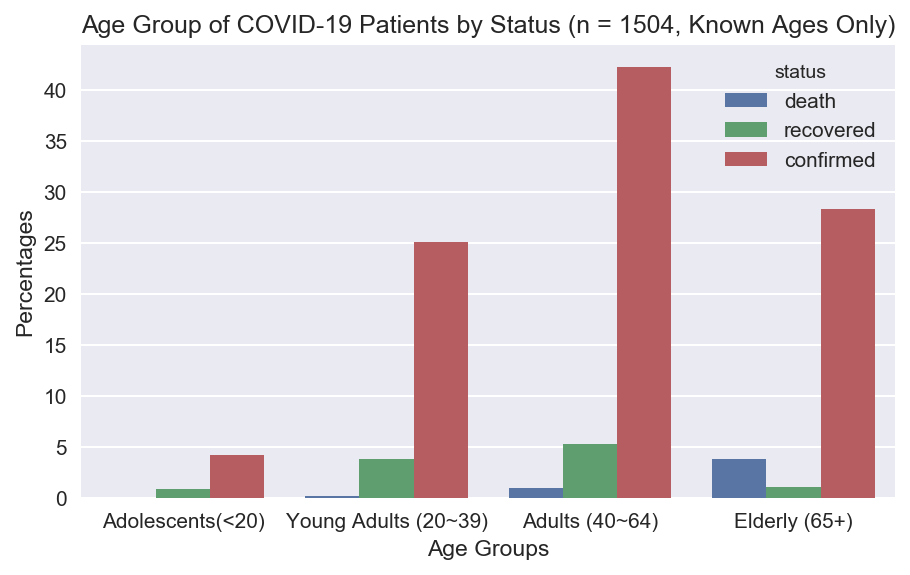

In [189]:
plt.figure(figsize=(7,4), dpi=150)
age_plot = sns.barplot(x='age', y='percentages', data=reshaped, hue='status')
plt.title('Age Group of COVID-19 Patients by Status (n = 1504, Known Ages Only)')
plt.ylabel('Percentages')
plt.xlabel('Age Groups')
age_plot